<a href="https://colab.research.google.com/github/rendrasatriar/Density-SILO/blob/Belambus_Selatan/Belambus_Selatan_SAP_HSAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [1]:
!pip install --quiet google-cloud-bigquery pandas pyarrow

In [4]:
from google.colab import auth
auth.authenticate_user()

In [5]:
from google.cloud import bigquery
import pandas as pd

PROJECT_ID = "study-density-silo"
DATASET_ID = "study_density"
TABLE_ID = "raw_data_belambus_selatan"

client = bigquery.Client(project=PROJECT_ID)

def fetch_single_block(project: str, dataset: str, table_id: str, max_rows: int = None) -> pd.DataFrame:
    table_full = f"{project}.{dataset}.{table_id}"
    query = f"SELECT * FROM `{table_full}`"
    job = client.query(query)
    if max_rows:
        return job.result(max_results=max_rows).to_dataframe()
    return job.to_dataframe()

In [6]:
# --- Ambil data satu blok ---
df_block = fetch_single_block(PROJECT_ID, DATASET_ID, TABLE_ID)
print(f"Loaded table: {PROJECT_ID}.{DATASET_ID}.{TABLE_ID}")
print("Rows:", len(df_block))
print("Columns:", len(df_block.columns))
print("Shape:", df_block.shape)
print("-" * 60)

# --- Informasi kolom dan tipe data ---
print("\nColumn info:")
print(df_block.dtypes)
print("\nMemory usage (MB):")
print(df_block.memory_usage(deep=True).sum() / 1024**2)

# --- Statistik numerik singkat ---
print("\nDescriptive statistics (numeric columns):")
display(df_block.describe().transpose())

# --- Distribusi kategori penting ---
if 'GEN_LYR' in df_block.columns:
    print("\nUnique GEN_LYR count:", df_block['GEN_LYR'].nunique())
    print("Top GEN_LYR value counts:")
    display(df_block['GEN_LYR'].value_counts().head(20))

if 'Material' in df_block.columns:
    print("\nUnique Material count:", df_block['Material'].nunique())
    print("Top Material value counts:")
    display(df_block['Material'].value_counts().head(20))

# --- Quick QAQC checks ---
print("\nQAQC checks:")
if {'Interval','From','To'}.issubset(df_block.columns):
    n_bad_interval = len(df_block[(df_block['Interval'] <= 0) | (df_block['To'] <= df_block['From'])])
    print("Rows with Interval <= 0 or To <= From:", n_bad_interval)
else:
    print("Columns Interval/From/To not all present for QAQC checks.")

Loaded table: study-density-silo.study_density.raw_data_belambus_selatan
Rows: 855
Columns: 16
Shape: (855, 16)
------------------------------------------------------------

Column info:
HoleId         object
Hill           object
Hill_Group     object
From          float64
To            float64
Interval      float64
CoreRec       float64
WetW          float64
H2O           float64
DryW          float64
Material       object
Layer          object
NEW_LYR        object
GEN_LYR        object
WTF           float64
DTF           float64
dtype: object

Memory usage (MB):
0.37732601165771484

Descriptive statistics (numeric columns):


,count,mean,std,min,25%,50%,75%,max
From,855.0,5.922185,3.674509,0.000000,3.000000,6.000000,8.675000,17.000000
To,855.0,6.635050,3.670369,0.300000,3.740000,6.400000,9.000000,18.000000
Interval,855.0,0.712865,0.294277,0.120000,0.450000,0.700000,1.000000,1.500000
CoreRec,855.0,0.991234,0.124041,0.260000,1.000000,1.000000,1.000000,3.100000
WetW,855.0,3.850371,1.839270,0.400000,2.295000,3.820000,5.206500,10.265000
H2O,855.0,23.257950,15.081707,0.639000,10.320500,22.187000,34.205500,65.541000
DryW,855.0,3.015953,1.621328,0.245000,1.620000,2.910000,4.309000,8.515000
WTF,855.0,1.869734,0.466007,0.722426,1.581269,1.811992,2.092399,4.652560
DTF,855.0,1.436012,0.438915,0.318491,1.131333,1.440388,1.737027,3.169096



Unique GEN_LYR count: 5
Top GEN_LYR value counts:


,count
GEN_LYR,
LIM,469
SAP,165
BRK,163
SAPX,46
LIMX,12



Unique Material count: 25
Top Material value counts:


,count
Material,
YLIM,189
Lim,128
ESAP,85
RLIM,80
Sap,49
BR,44
SAP,40
SPT,36
HGT,35



QAQC checks:
Rows with Interval <= 0 or To <= From: 0


# Filter By GEN_LYR dan Material

In [71]:

gen_lyr_input = input("Masukkan GEN_LYR yang ingin difilter: ").strip()
material_input = input("Masukkan Material yang ingin difilter: ").strip()

df_filtered = df_block.copy()

if 'GEN_LYR' in df_filtered.columns:
    df_filtered = df_filtered[df_filtered['GEN_LYR'].str.upper() == gen_lyr_input.upper()]

if 'Material' in df_filtered.columns:
    df_filtered = df_filtered[df_filtered['Material'].str.upper() == material_input.upper()]

print(f"\nFiltered rows: {len(df_filtered)}")
display(df_filtered.head(133))

Masukkan GEN_LYR yang ingin difilter: SAP
Masukkan Material yang ingin difilter: HSAP

Filtered rows: 20


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF
158,CS8230796,Belambus Blok 1 Spasi 100,Belambus_Selatan,5.70,6.00,0.30,1.0,1.280,28.125,0.920,HSAP,SAP,SAP,SAP,1.454594,1.045489
169,CS8230797,Belambus Blok 1 Spasi 100,Belambus_Selatan,7.00,8.00,1.00,1.0,4.620,20.238,3.685,HSAP,SAP,SAP,SAP,1.575052,1.256292
185,CS8230798,Belambus Blok 1 Spasi 100,Belambus_Selatan,5.00,5.25,0.25,1.0,1.260,19.444,1.015,HSAP,SAP,SAP,SAP,1.718239,1.384137
200,CS8230802,Belambus Blok 1 Spasi 100,Belambus_Selatan,6.00,6.30,0.30,1.0,1.455,18.213,1.190,HSAP,Sap,SAP,SAP,1.653464,1.352317
201,CS8230802,Belambus Blok 1 Spasi 100,Belambus_Selatan,6.30,6.55,0.25,1.0,1.000,38.500,0.615,HSAP,Sap,SAP,SAP,1.363681,0.838664
217,CS8230803,Belambus Blok 1 Spasi 100,Belambus_Selatan,7.30,7.50,0.20,1.0,1.085,28.111,0.780,HSAP,Sap,SAP,SAP,1.849493,1.329589
247,CS8230808,Belambus Blok 1 Spasi 100,Belambus_Selatan,9.00,10.00,1.00,1.0,4.150,18.193,3.395,HSAP,SAP,SAP,SAP,1.414819,1.157425
248,CS8230808,Belambus Blok 1 Spasi 100,Belambus_Selatan,10.00,10.30,0.30,1.0,1.590,17.610,1.310,HSAP,BR,SAP,SAP,1.806878,1.488686
289,CS8230810,Belambus Blok 1 Spasi 100,Belambus_Selatan,7.00,7.45,0.45,1.0,1.640,26.220,1.210,HSAP,Sap,SAP,SAP,1.242465,0.916697
303,CS8230811,Belambus Blok 1 Spasi 100,Belambus_Selatan,7.90,8.30,0.40,1.0,1.395,18.638,1.135,HSAP,Sap,SAP,SAP,1.188960,0.967362


# Filter By Interval

Descriptive statistics for Interval:
Count: 20
Mean: 0.450000
Standard Error: 0.053435
Median: 0.4
Mode: 0.4
Standard Deviation: 0.238967
Sample Variance: 0.057105
Kurtosis: 0.767971
Skewness: 1.350340
Range: 0.8
Minimum: 0.2
Maximum: 1.0
Sum: 9.000000000000002
Confidence Level (95%): ±0.111840

Bin calculation:
Freedman–Diaconis -> bins: 7, bin width: 0.119731
Sturges -> bins: 6, bin width: 0.133333


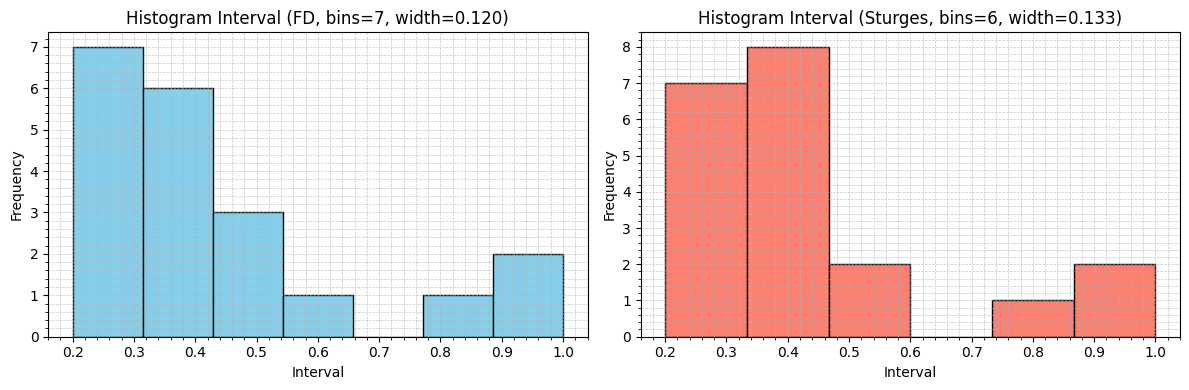


Tabel Histogram (Freedman–Diaconis):


,Bin Start,Bin End,Frequency
0,0.200000,0.314286,7
1,0.314286,0.428571,6
2,0.428571,0.542857,3
3,0.542857,0.657143,1
4,0.657143,0.771429,0
5,0.771429,0.885714,1
6,0.885714,1.000000,2



Tabel Histogram (Sturges):


,Bin Start,Bin End,Frequency
0,0.200000,0.333333,7
1,0.333333,0.466667,8
2,0.466667,0.600000,2
3,0.600000,0.733333,0
4,0.733333,0.866667,1
5,0.866667,1.000000,2


In [72]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd # Added import for pandas
from matplotlib.ticker import AutoMinorLocator

def compute_bins(series, method='fd'):
    data = series.dropna().values
    n = len(data)
    if n < 2:
        return 10, None
    if method == 'fd':
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25
        if iqr == 0:
            return int(np.sqrt(n)), None
        h = 2 * iqr / (n ** (1/3))   # Freedman–Diaconis bin width
        bins = max(5, int(np.ceil((data.max() - data.min()) / h)))
        return bins, h
    elif method == 'sturges':
        bins = int(np.ceil(np.log2(n) + 1))
        h = (data.max() - data.min()) / bins
        return bins, h
    else:
        return 10, None

def descriptive_stats(series):
    data = series.dropna().values
    n = len(data)
    mean = np.mean(data)
    std = np.std(data, ddof=1)
    se = stats.sem(data)
    median = np.median(data)
    mode = stats.mode(data, keepdims=True).mode[0] if n > 0 else None
    var = np.var(data, ddof=1)
    kurt = stats.kurtosis(data)
    skew = stats.skew(data)
    rng = np.max(data) - np.min(data)
    conf95 = stats.t.ppf(0.975, n-1) * se if n > 1 else None

    print("Descriptive statistics for Interval:")
    print(f"Count: {n}")
    print(f"Mean: {mean:.6f}")
    print(f"Standard Error: {se:.6f}")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std:.6f}")
    print(f"Sample Variance: {var:.6f}")
    print(f"Kurtosis: {kurt:.6f}")
    print(f"Skewness: {skew:.6f}")
    print(f"Range: {rng}")
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")
    print(f"Sum: {np.sum(data)}")
    print(f"Confidence Level (95%): \u00b1{conf95:.6f}")

def plot_interval_histograms(df_filtered):
    if 'Interval' not in df_filtered.columns:
        print("Kolom 'Interval' tidak ada di dataframe.")
        return

    data = df_filtered['Interval'].dropna()

    # --- tampilkan descriptive statistics ---
    descriptive_stats(data)

    # --- hitung jumlah bins dan bin width ---
    bins_fd, h_fd = compute_bins(data, method='fd')
    bins_st, h_st = compute_bins(data, method='sturges')

    print("\nBin calculation:")
    print(f"Freedman\u2013Diaconis -> bins: {bins_fd}, bin width: {h_fd:.6f}")
    print(f"Sturges -> bins: {bins_st}, bin width: {h_st:.6f}")

    # --- plot histogram dengan minor ticks ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Freedman\u2013Diaconis
    counts_fd, edges_fd, _ = axes[0].hist(data, bins=bins_fd, color='skyblue', edgecolor='black') # Capture counts and edges
    axes[0].set_title(f"Histogram Interval (FD, bins={bins_fd}, width={h_fd:.3f})")
    axes[0].set_xlabel("Interval")
    axes[0].set_ylabel("Frequency")
    axes[0].xaxis.set_minor_locator(AutoMinorLocator())
    axes[0].yaxis.set_minor_locator(AutoMinorLocator())
    axes[0].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Sturges
    counts_st, edges_st, _ = axes[1].hist(data, bins=bins_st, color='salmon', edgecolor='black') # Capture counts and edges
    axes[1].set_title(f"Histogram Interval (Sturges, bins={bins_st}, width={h_st:.3f})")
    axes[1].set_xlabel("Interval")
    axes[1].set_ylabel("Frequency")
    axes[1].xaxis.set_minor_locator(AutoMinorLocator())
    axes[1].yaxis.set_minor_locator(AutoMinorLocator())
    axes[1].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

    # --- buat tabel histogram ---
    table_fd = pd.DataFrame({
        "Bin Start": edges_fd[:-1],
        "Bin End": edges_fd[1:],
        "Frequency": counts_fd.astype(int)
    })

    table_st = pd.DataFrame({
        "Bin Start": edges_st[:-1],
        "Bin End": edges_st[1:],
        "Frequency": counts_st.astype(int)
    })

    print("\nTabel Histogram (Freedman\u2013Diaconis):")
    display(table_fd)

    print("\nTabel Histogram (Sturges):")
    display(table_st)

    return data

# --- Contoh pemanggilan ---
interval_data = plot_interval_histograms(df_filtered) # Corrected function call

In [73]:
# Pastikan df_filtered sudah ada
# Contoh: df_filtered = filter_data(df_block, "LIM", "RLIM")

# Minta input dari user
lower_bound = float(input("Masukkan batas bawah (is greater than or equal to): "))
upper_bound = float(input("Masukkan batas atas (is less than or equal to): "))

# Filter data sesuai input
df_interval = df_filtered[(df_filtered['Interval'] >= lower_bound) &
                       (df_filtered['Interval'] <= upper_bound)]

print(f"\nFiltered rows: {len(df_interval)}")
display(df_interval.head(50))

Masukkan batas bawah (is greater than or equal to): 0.200000
Masukkan batas atas (is less than or equal to): 0.542857

Filtered rows: 16


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF
158,CS8230796,Belambus Blok 1 Spasi 100,Belambus_Selatan,5.70,6.00,0.30,1.0,1.280,28.125,0.920,HSAP,SAP,SAP,SAP,1.454594,1.045489
185,CS8230798,Belambus Blok 1 Spasi 100,Belambus_Selatan,5.00,5.25,0.25,1.0,1.260,19.444,1.015,HSAP,SAP,SAP,SAP,1.718239,1.384137
200,CS8230802,Belambus Blok 1 Spasi 100,Belambus_Selatan,6.00,6.30,0.30,1.0,1.455,18.213,1.190,HSAP,Sap,SAP,SAP,1.653464,1.352317
201,CS8230802,Belambus Blok 1 Spasi 100,Belambus_Selatan,6.30,6.55,0.25,1.0,1.000,38.500,0.615,HSAP,Sap,SAP,SAP,1.363681,0.838664
217,CS8230803,Belambus Blok 1 Spasi 100,Belambus_Selatan,7.30,7.50,0.20,1.0,1.085,28.111,0.780,HSAP,Sap,SAP,SAP,1.849493,1.329589
248,CS8230808,Belambus Blok 1 Spasi 100,Belambus_Selatan,10.00,10.30,0.30,1.0,1.590,17.610,1.310,HSAP,BR,SAP,SAP,1.806878,1.488686
289,CS8230810,Belambus Blok 1 Spasi 100,Belambus_Selatan,7.00,7.45,0.45,1.0,1.640,26.220,1.210,HSAP,Sap,SAP,SAP,1.242465,0.916697
303,CS8230811,Belambus Blok 1 Spasi 100,Belambus_Selatan,7.90,8.30,0.40,1.0,1.395,18.638,1.135,HSAP,Sap,SAP,SAP,1.188960,0.967362
304,CS8230811,Belambus Blok 1 Spasi 100,Belambus_Selatan,6.00,6.50,0.50,1.0,2.115,16.312,1.770,HSAP,Sap,SAP,SAP,1.442093,1.206858
305,CS8230811,Belambus Blok 1 Spasi 100,Belambus_Selatan,9.60,10.00,0.40,1.0,1.585,24.606,1.195,HSAP,Sap,SAP,SAP,1.350897,1.018500


# Filter By Recovery

/tmp/ipython-input-1537619829.py:41: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = stats.kurtosis(data) if n > 3 else np.nan
/tmp/ipython-input-1537619829.py:42: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew = stats.skew(data) if n > 2 else np.nan



Descriptive statistics for CoreRec:
Count: 16
Mean: 1.000000
Standard Error: 0.000000
Median: 1.0
Mode: 1.0
Standard Deviation: 0.000000
Sample Variance: 0.000000
Kurtosis: N/A
Skewness: N/A
Range: 0.0
Minimum: 1.0
Maximum: 1.0
Sum: 16.0
Confidence Level (95%): ±0.000000

Bin calculation:
Freedman–Diaconis -> bins=5, width=N/A
Sturges -> bins=5, width=N/A


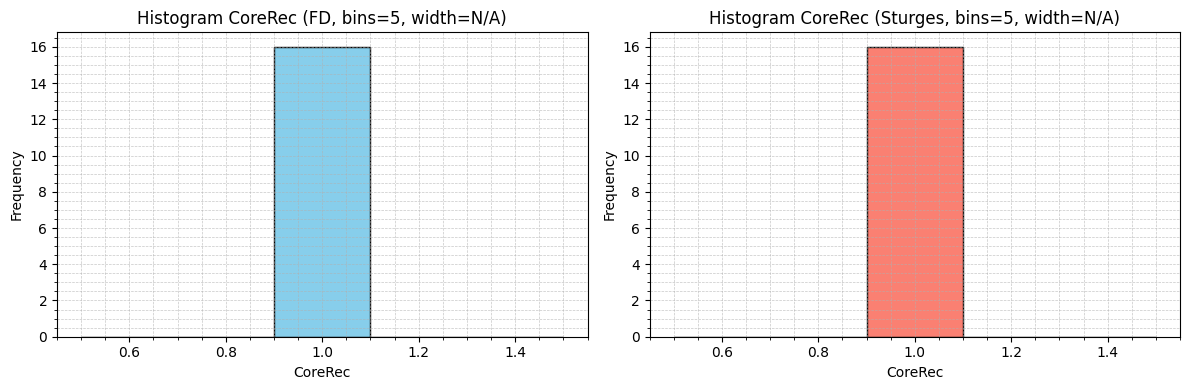


Tabel Histogram (Freedman–Diaconis):


,Bin Start,Bin End,Frequency
0,0.5,0.7,0
1,0.7,0.9,0
2,0.9,1.1,16
3,1.1,1.3,0
4,1.3,1.5,0



Tabel Histogram (Sturges):


,Bin Start,Bin End,Frequency
0,0.5,0.7,0
1,0.7,0.9,0
2,0.9,1.1,16
3,1.1,1.3,0
4,1.3,1.5,0


In [74]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from matplotlib.ticker import AutoMinorLocator

def compute_bins(series, method='fd'):
    data = series.dropna().values
    n = len(data)
    if n < 2:
        return 10, None
    if method == 'fd':
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25
        if iqr == 0:
            return max(5, int(np.sqrt(n))), None
        h = 2 * iqr / (n ** (1/3))
        bins = max(5, int(np.ceil((data.max() - data.min()) / h)))
        return bins, h
    elif method == 'sturges':
        if n == 0 or (data.max() - data.min()) == 0:
            return max(5, int(np.sqrt(n))), None
        bins = int(np.ceil(np.log2(n) + 1))
        h = (data.max() - data.min()) / bins
        return bins, h
    else:
        return 10, None

def descriptive_stats(series, label="CoreRec"):
    data = series.dropna().values
    n = len(data)
    if n == 0:
        print(f"\nNo data available for {label}.")
        return

    mean = np.mean(data)
    std = np.std(data, ddof=1) if n > 1 else np.nan
    se = stats.sem(data) if n > 1 else np.nan
    median = np.median(data)
    mode = stats.mode(data, keepdims=True).mode[0]
    var = np.var(data, ddof=1) if n > 1 else np.nan
    kurt = stats.kurtosis(data) if n > 3 else np.nan
    skew = stats.skew(data) if n > 2 else np.nan
    rng = np.max(data) - np.min(data)
    conf95 = stats.t.ppf(0.975, n-1) * se if n > 1 else np.nan

    print(f"\nDescriptive statistics for {label}:")
    print(f"Count: {n}")
    print(f"Mean: {mean:.6f}")
    print(f"Standard Error: {se:.6f}" if not np.isnan(se) else "Standard Error: N/A")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std:.6f}" if not np.isnan(std) else "Standard Deviation: N/A")
    print(f"Sample Variance: {var:.6f}" if not np.isnan(var) else "Sample Variance: N/A")
    print(f"Kurtosis: {kurt:.6f}" if not np.isnan(kurt) else "Kurtosis: N/A")
    print(f"Skewness: {skew:.6f}" if not np.isnan(skew) else "Skewness: N/A")
    print(f"Range: {rng}")
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")
    print(f"Sum: {np.sum(data)}")
    print(f"Confidence Level (95%): \u00b1{conf95:.6f}" if not np.isnan(conf95) else "Confidence Level (95%): N/A")

def analyze_coreRec(df_interval):
    if 'CoreRec' not in df_interval.columns:
        print("Kolom 'CoreRec' tidak ada di dataframe.")
        return

    data = df_interval['CoreRec'].dropna()
    if data.empty:
        print("Tidak ada data 'CoreRec' yang valid setelah drop NaN.")
        return

    # --- tampilkan descriptive statistics ---
    descriptive_stats(data, label="CoreRec")

    # --- hitung jumlah bins dan bin width ---
    bins_fd, h_fd = compute_bins(data, method='fd')
    bins_st, h_st = compute_bins(data, method='sturges')

    width_fd_str = f"{h_fd:.6f}" if h_fd is not None else "N/A"
    width_st_str = f"{h_st:.6f}" if h_st is not None else "N/A"

    print("\nBin calculation:")
    print(f"Freedman\u2013Diaconis -> bins={bins_fd}, width={width_fd_str}")
    print(f"Sturges -> bins={bins_st}, width={width_st_str}")

    # --- plot histogram dengan minor ticks ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Freedman\u2013Diaconis
    counts_fd, edges_fd, _ = axes[0].hist(data, bins=bins_fd, color='skyblue', edgecolor='black') # Capture counts and edges
    axes[0].set_title(f"Histogram CoreRec (FD, bins={bins_fd}, width={width_fd_str})")
    axes[0].set_xlabel("CoreRec")
    axes[0].set_ylabel("Frequency")
    axes[0].xaxis.set_minor_locator(AutoMinorLocator())
    axes[0].yaxis.set_minor_locator(AutoMinorLocator())
    axes[0].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Sturges
    counts_st, edges_st, _ = axes[1].hist(data, bins=bins_st, color='salmon', edgecolor='black') # Capture counts and edges
    axes[1].set_title(f"Histogram CoreRec (Sturges, bins={bins_st}, width={width_st_str})")
    axes[1].set_xlabel("CoreRec")
    axes[1].set_ylabel("Frequency")
    axes[1].xaxis.set_minor_locator(AutoMinorLocator())
    axes[1].yaxis.set_minor_locator(AutoMinorLocator())
    axes[1].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

    # --- buat tabel histogram ---
    table_fd = pd.DataFrame({
        "Bin Start": edges_fd[:-1],
        "Bin End": edges_fd[1:],
        "Frequency": counts_fd.astype(int)
    })

    table_st = pd.DataFrame({
        "Bin Start": edges_st[:-1],
        "Bin End": edges_st[1:],
        "Frequency": counts_st.astype(int)
    })

    print("\nTabel Histogram (Freedman\u2013Diaconis):")
    display(table_fd)

    print("\nTabel Histogram (Sturges):")
    display(table_st)

    return data

# --- Contoh pemanggilan ---
coreRec_data = analyze_coreRec(df_interval)

In [75]:
lower_bound = float(input("Masukkan batas bawah (is greater than or equal to): "))
upper_bound = float(input("Masukkan batas atas (is less than or equal to): "))


df_recovery = df_interval[(df_interval['CoreRec'] >= lower_bound) &
                       (df_interval['CoreRec'] <= upper_bound)]

print(f"\nFiltered rows: {len(df_recovery)}")
display(df_recovery.head(47))

Masukkan batas bawah (is greater than or equal to): 0.9
Masukkan batas atas (is less than or equal to): 1.1

Filtered rows: 16


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF
158,CS8230796,Belambus Blok 1 Spasi 100,Belambus_Selatan,5.70,6.00,0.30,1.0,1.280,28.125,0.920,HSAP,SAP,SAP,SAP,1.454594,1.045489
185,CS8230798,Belambus Blok 1 Spasi 100,Belambus_Selatan,5.00,5.25,0.25,1.0,1.260,19.444,1.015,HSAP,SAP,SAP,SAP,1.718239,1.384137
200,CS8230802,Belambus Blok 1 Spasi 100,Belambus_Selatan,6.00,6.30,0.30,1.0,1.455,18.213,1.190,HSAP,Sap,SAP,SAP,1.653464,1.352317
201,CS8230802,Belambus Blok 1 Spasi 100,Belambus_Selatan,6.30,6.55,0.25,1.0,1.000,38.500,0.615,HSAP,Sap,SAP,SAP,1.363681,0.838664
217,CS8230803,Belambus Blok 1 Spasi 100,Belambus_Selatan,7.30,7.50,0.20,1.0,1.085,28.111,0.780,HSAP,Sap,SAP,SAP,1.849493,1.329589
248,CS8230808,Belambus Blok 1 Spasi 100,Belambus_Selatan,10.00,10.30,0.30,1.0,1.590,17.610,1.310,HSAP,BR,SAP,SAP,1.806878,1.488686
289,CS8230810,Belambus Blok 1 Spasi 100,Belambus_Selatan,7.00,7.45,0.45,1.0,1.640,26.220,1.210,HSAP,Sap,SAP,SAP,1.242465,0.916697
303,CS8230811,Belambus Blok 1 Spasi 100,Belambus_Selatan,7.90,8.30,0.40,1.0,1.395,18.638,1.135,HSAP,Sap,SAP,SAP,1.188960,0.967362
304,CS8230811,Belambus Blok 1 Spasi 100,Belambus_Selatan,6.00,6.50,0.50,1.0,2.115,16.312,1.770,HSAP,Sap,SAP,SAP,1.442093,1.206858
305,CS8230811,Belambus Blok 1 Spasi 100,Belambus_Selatan,9.60,10.00,0.40,1.0,1.585,24.606,1.195,HSAP,Sap,SAP,SAP,1.350897,1.018500


# Filter By Wet Weight

Tidak ada data dengan Interval=1.0 dan CoreRec=1.0.
Menggunakan seluruh data sebagai acuan residual.

Residual IQR acuan:
Q1: -0.111, Q3: 0.124, IQR: 0.235
Lower margin: -0.463, Upper margin: 0.476


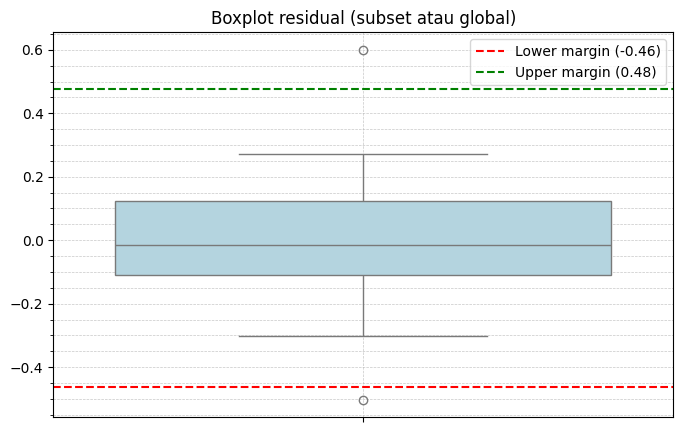

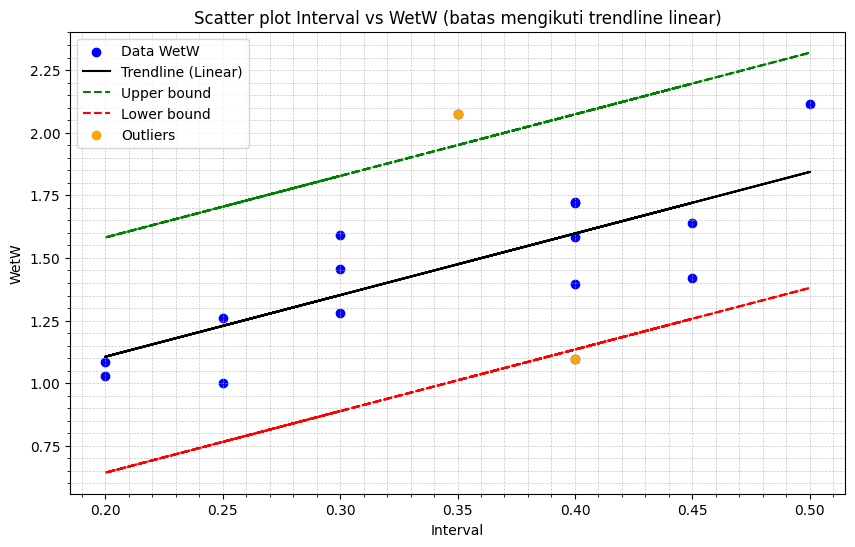


Outlier WetW berdasarkan trendline linear + IQR residual acuan:
        HoleId                       Hill        Hill_Group  From    To  \
377  CS8230818  Belambus Blok 1 Spasi 100  Belambus_Selatan   9.0  9.35   
715  CS8230886  Belambus Blok 1 Spasi 100  Belambus_Selatan   7.6  8.00   

     Interval  CoreRec   WetW     H2O  DryW Material Layer NEW_LYR GEN_LYR  \
377      0.35      1.0  2.075  59.036  0.85     HSAP   SAP     SAP     SAP   
715      0.40      1.0  1.095  38.813  0.67     HSAP   Sap     SAP     SAP   

          WTF       DTF  
377  2.021171  0.827949  
715  0.933269  0.571042  


In [76]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
from sklearn.linear_model import LinearRegression

def detect_outliers_wetw_trend(df_recovery, interval_value=1.00, coreRec_value=1.00):
    # --- Filter subset sesuai kriteria ---
    subset = df_recovery[(df_recovery['Interval'] == interval_value) &
                         (df_recovery['CoreRec'] == coreRec_value)]

    # --- Fit trendline linear (Interval vs WetW) ---
    X = df_recovery['Interval'].values.reshape(-1,1)
    y = df_recovery['WetW'].values
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)

    # --- Tentukan subset untuk residual ---
    if subset.empty:
        print(f"Tidak ada data dengan Interval={interval_value} dan CoreRec={coreRec_value}.")
        print("Menggunakan seluruh data sebagai acuan residual.")
        subset_X = X
        subset_y = y
    else:
        subset_X = subset['Interval'].values.reshape(-1,1)
        subset_y = subset['WetW'].values

    subset_pred = model.predict(subset_X)
    residuals = subset_y - subset_pred

    # --- Hitung IQR residual subset/global ---
    q1, q3 = np.percentile(residuals, [25, 75])
    iqr = q3 - q1
    lower_margin = q1 - 1.5 * iqr
    upper_margin = q3 + 1.5 * iqr

    print(f"\nResidual IQR acuan:")
    print(f"Q1: {q1:.3f}, Q3: {q3:.3f}, IQR: {iqr:.3f}")
    print(f"Lower margin: {lower_margin:.3f}, Upper margin: {upper_margin:.3f}")

    # --- Boxplot residual subset/global ---
    plt.figure(figsize=(8,5))
    sns.boxplot(y=residuals, color='lightblue')
    plt.axhline(lower_margin, color='red', linestyle='--', label=f'Lower margin ({lower_margin:.2f})')
    plt.axhline(upper_margin, color='green', linestyle='--', label=f'Upper margin ({upper_margin:.2f})')
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.title("Boxplot residual (subset atau global)")
    plt.legend()
    plt.show()

    # --- Scatter plot seluruh data + trendline + batas mengikuti trendline ---
    plt.figure(figsize=(10,6))
    plt.scatter(df_recovery['Interval'], df_recovery['WetW'], color='blue', label='Data WetW')
    plt.plot(df_recovery['Interval'], y_pred, color='black', label='Trendline (Linear)')

    # Batas atas/bawah mengikuti trendline
    plt.plot(df_recovery['Interval'], y_pred + upper_margin, color='green', linestyle='--', label='Upper bound')
    plt.plot(df_recovery['Interval'], y_pred + lower_margin, color='red', linestyle='--', label='Lower bound')

    # Outlier = data di luar batas trendline ± margin
    outliers = df_recovery[(df_recovery['WetW'] > y_pred + upper_margin) |
                           (df_recovery['WetW'] < y_pred + lower_margin)]
    if not outliers.empty:
        plt.scatter(outliers['Interval'], outliers['WetW'], color='orange', label='Outliers')

    plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.title("Scatter plot Interval vs WetW (batas mengikuti trendline linear)")
    plt.xlabel("Interval")
    plt.ylabel("WetW")
    plt.legend()
    plt.show()

    return {
        "outliers": outliers,
        "margins": {"lower": lower_margin, "upper": upper_margin},
        "trendline_coef": {"slope": model.coef_[0], "intercept": model.intercept_}
    }

# --- Contoh pemanggilan ---
result = detect_outliers_wetw_trend(df_recovery, interval_value=1.00, coreRec_value=1.00)
if result:
    print("\nOutlier WetW berdasarkan trendline linear + IQR residual acuan:")
    print(result["outliers"].head())

## Normalisasi Weight terhadap recovery

In [77]:
import numpy as np
from IPython.display import display

def normalize_wetw(df_recovery):
    if 'WetW' not in df_recovery.columns or 'CoreRec' not in df_recovery.columns:
        print("Kolom 'WetW' atau 'CoreRec' tidak ada di dataframe.")
        return df_recovery

    # Buat kolom baru Normalized_WetW
    df_recovery['Normalized_WetW'] = np.where(
        df_recovery['CoreRec'] > 1.0,
        df_recovery['WetW'] / 1,          # jika CoreRec > 1.0
        df_recovery['WetW'] / df_recovery['CoreRec']  # jika CoreRec <= 1.0
    )

    print("\nNormalisasi WetW terhadap Recovery selesai.")
    # tampilkan seluruh dataframe dengan kolom tambahan
    display(df_recovery)

    return df_recovery

# --- Contoh pemanggilan ---
df_recovery = normalize_wetw(df_recovery)


Normalisasi WetW terhadap Recovery selesai.


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF,Normalized_WetW
158,CS8230796,Belambus Blok 1 Spasi 100,Belambus_Selatan,5.70,6.00,0.30,1.0,1.280,28.125,0.920,HSAP,SAP,SAP,SAP,1.454594,1.045489,1.280
185,CS8230798,Belambus Blok 1 Spasi 100,Belambus_Selatan,5.00,5.25,0.25,1.0,1.260,19.444,1.015,HSAP,SAP,SAP,SAP,1.718239,1.384137,1.260
200,CS8230802,Belambus Blok 1 Spasi 100,Belambus_Selatan,6.00,6.30,0.30,1.0,1.455,18.213,1.190,HSAP,Sap,SAP,SAP,1.653464,1.352317,1.455
201,CS8230802,Belambus Blok 1 Spasi 100,Belambus_Selatan,6.30,6.55,0.25,1.0,1.000,38.500,0.615,HSAP,Sap,SAP,SAP,1.363681,0.838664,1.000
217,CS8230803,Belambus Blok 1 Spasi 100,Belambus_Selatan,7.30,7.50,0.20,1.0,1.085,28.111,0.780,HSAP,Sap,SAP,SAP,1.849493,1.329589,1.085
248,CS8230808,Belambus Blok 1 Spasi 100,Belambus_Selatan,10.00,10.30,0.30,1.0,1.590,17.610,1.310,HSAP,BR,SAP,SAP,1.806878,1.488686,1.590
289,CS8230810,Belambus Blok 1 Spasi 100,Belambus_Selatan,7.00,7.45,0.45,1.0,1.640,26.220,1.210,HSAP,Sap,SAP,SAP,1.242465,0.916697,1.640
303,CS8230811,Belambus Blok 1 Spasi 100,Belambus_Selatan,7.90,8.30,0.40,1.0,1.395,18.638,1.135,HSAP,Sap,SAP,SAP,1.188960,0.967362,1.395
304,CS8230811,Belambus Blok 1 Spasi 100,Belambus_Selatan,6.00,6.50,0.50,1.0,2.115,16.312,1.770,HSAP,Sap,SAP,SAP,1.442093,1.206858,2.115
305,CS8230811,Belambus Blok 1 Spasi 100,Belambus_Selatan,9.60,10.00,0.40,1.0,1.585,24.606,1.195,HSAP,Sap,SAP,SAP,1.350897,1.018500,1.585


Tidak ada data dengan Interval=1.0 dan CoreRec=1.0.
Menggunakan seluruh data sebagai acuan residual.

Residual IQR acuan:
Q1: -0.111, Q3: 0.124, IQR: 0.235
Lower margin: -0.463, Upper margin: 0.476


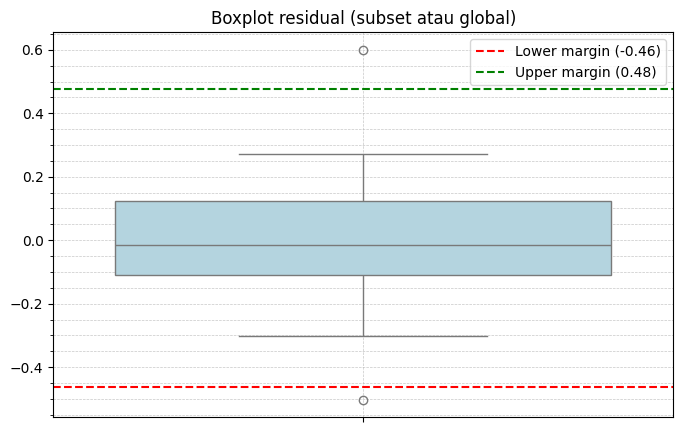

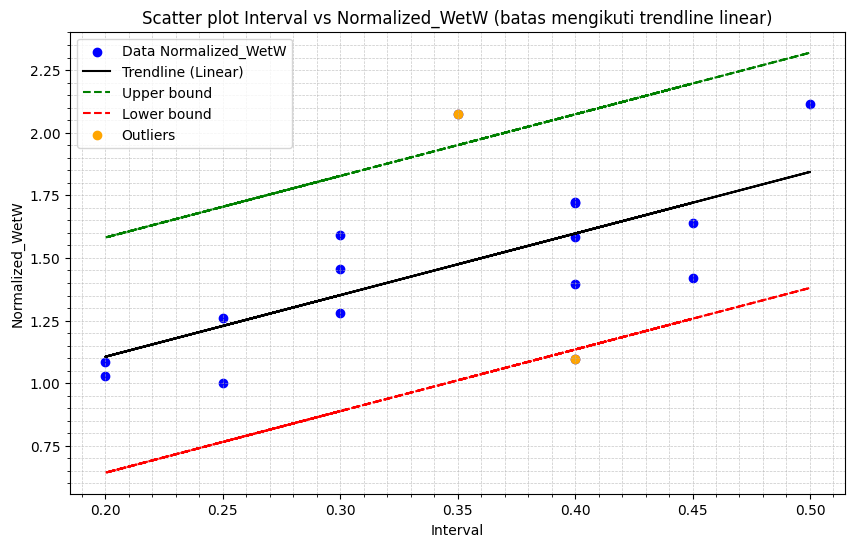

,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF,Normalized_WetW,Trendline_Pred,Outlier_Status
158,CS8230796,Belambus Blok 1 Spasi 100,Belambus_Selatan,5.70,6.00,0.30,1.0,1.280,28.125,0.920,HSAP,SAP,SAP,SAP,1.454594,1.045489,1.280,1.351626,Normal
185,CS8230798,Belambus Blok 1 Spasi 100,Belambus_Selatan,5.00,5.25,0.25,1.0,1.260,19.444,1.015,HSAP,SAP,SAP,SAP,1.718239,1.384137,1.260,1.228693,Normal
200,CS8230802,Belambus Blok 1 Spasi 100,Belambus_Selatan,6.00,6.30,0.30,1.0,1.455,18.213,1.190,HSAP,Sap,SAP,SAP,1.653464,1.352317,1.455,1.351626,Normal
201,CS8230802,Belambus Blok 1 Spasi 100,Belambus_Selatan,6.30,6.55,0.25,1.0,1.000,38.500,0.615,HSAP,Sap,SAP,SAP,1.363681,0.838664,1.000,1.228693,Normal
217,CS8230803,Belambus Blok 1 Spasi 100,Belambus_Selatan,7.30,7.50,0.20,1.0,1.085,28.111,0.780,HSAP,Sap,SAP,SAP,1.849493,1.329589,1.085,1.105761,Normal
248,CS8230808,Belambus Blok 1 Spasi 100,Belambus_Selatan,10.00,10.30,0.30,1.0,1.590,17.610,1.310,HSAP,BR,SAP,SAP,1.806878,1.488686,1.590,1.351626,Normal
289,CS8230810,Belambus Blok 1 Spasi 100,Belambus_Selatan,7.00,7.45,0.45,1.0,1.640,26.220,1.210,HSAP,Sap,SAP,SAP,1.242465,0.916697,1.640,1.720423,Normal
303,CS8230811,Belambus Blok 1 Spasi 100,Belambus_Selatan,7.90,8.30,0.40,1.0,1.395,18.638,1.135,HSAP,Sap,SAP,SAP,1.188960,0.967362,1.395,1.597491,Normal
304,CS8230811,Belambus Blok 1 Spasi 100,Belambus_Selatan,6.00,6.50,0.50,1.0,2.115,16.312,1.770,HSAP,Sap,SAP,SAP,1.442093,1.206858,2.115,1.843356,Normal
305,CS8230811,Belambus Blok 1 Spasi 100,Belambus_Selatan,9.60,10.00,0.40,1.0,1.585,24.606,1.195,HSAP,Sap,SAP,SAP,1.350897,1.018500,1.585,1.597491,Normal


In [78]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
from sklearn.linear_model import LinearRegression

def detect_outliers_normalized_wetw_trend(df_recovery, interval_value=1.00, coreRec_value=1.00):
    # --- Filter subset sesuai kriteria ---
    subset = df_recovery[(df_recovery['Interval'] == interval_value) &
                         (df_recovery['CoreRec'] == coreRec_value)]

    # --- Fit trendline linear (Interval vs Normalized_WetW) ---
    X = df_recovery['Interval'].values.reshape(-1,1)
    y = df_recovery['Normalized_WetW'].values
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)

    # --- Tentukan subset untuk residual ---
    if subset.empty:
        print(f"Tidak ada data dengan Interval={interval_value} dan CoreRec={coreRec_value}.")
        print("Menggunakan seluruh data sebagai acuan residual.")
        subset_X = X
        subset_y = y
    else:
        subset_X = subset['Interval'].values.reshape(-1,1)
        subset_y = subset['Normalized_WetW'].values

    subset_pred = model.predict(subset_X)
    residuals = subset_y - subset_pred

    # --- Hitung IQR residual subset/global ---
    q1, q3 = np.percentile(residuals, [25, 75])
    iqr = q3 - q1
    lower_margin = q1 - 1.5 * iqr
    upper_margin = q3 + 1.5 * iqr

    print(f"\nResidual IQR acuan:")
    print(f"Q1: {q1:.3f}, Q3: {q3:.3f}, IQR: {iqr:.3f}")
    print(f"Lower margin: {lower_margin:.3f}, Upper margin: {upper_margin:.3f}")

    # --- Tambahkan kolom status outlier ---
    def classify_outlier(val, pred):
        if val < pred + lower_margin:
            return "Outlier bawah"
        elif val > pred + upper_margin:
            return "Outlier atas"
        else:
            return "Normal"

    df_recovery['Trendline_Pred'] = model.predict(df_recovery['Interval'].values.reshape(-1,1))
    df_recovery['Outlier_Status'] = [
        classify_outlier(val, pred)
        for val, pred in zip(df_recovery['Normalized_WetW'], df_recovery['Trendline_Pred'])
    ]

    # --- Boxplot residual subset/global ---
    plt.figure(figsize=(8,5))
    sns.boxplot(y=residuals, color='lightblue')
    plt.axhline(lower_margin, color='red', linestyle='--', label=f'Lower margin ({lower_margin:.2f})')
    plt.axhline(upper_margin, color='green', linestyle='--', label=f'Upper margin ({upper_margin:.2f})')
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.title("Boxplot residual (subset atau global)")
    plt.legend()
    plt.show()

    # --- Scatter plot seluruh data + trendline + batas mengikuti trendline ---
    plt.figure(figsize=(10,6))
    plt.scatter(df_recovery['Interval'], df_recovery['Normalized_WetW'], color='blue', label='Data Normalized_WetW')
    plt.plot(df_recovery['Interval'], df_recovery['Trendline_Pred'], color='black', label='Trendline (Linear)')

    # Batas atas/bawah mengikuti trendline
    plt.plot(df_recovery['Interval'], df_recovery['Trendline_Pred'] + upper_margin,
             color='green', linestyle='--', label='Upper bound')
    plt.plot(df_recovery['Interval'], df_recovery['Trendline_Pred'] + lower_margin,
             color='red', linestyle='--', label='Lower bound')

    # Outlier ditandai oranye
    outliers = df_recovery[df_recovery['Outlier_Status'] != "Normal"]
    if not outliers.empty:
        plt.scatter(outliers['Interval'], outliers['Normalized_WetW'], color='orange', label='Outliers')

    plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.title("Scatter plot Interval vs Normalized_WetW (batas mengikuti trendline linear)")
    plt.xlabel("Interval")
    plt.ylabel("Normalized_WetW")
    plt.legend()
    plt.show()

    return df_recovery

# --- Contoh pemanggilan ---
df_recovery = detect_outliers_normalized_wetw_trend(df_recovery, interval_value=1.00, coreRec_value=1.00)
display(df_recovery.head(15))


Bin calculation:
Freedman–Diaconis -> bins=5, width=0.350220
Sturges -> bins=5, width=0.223000


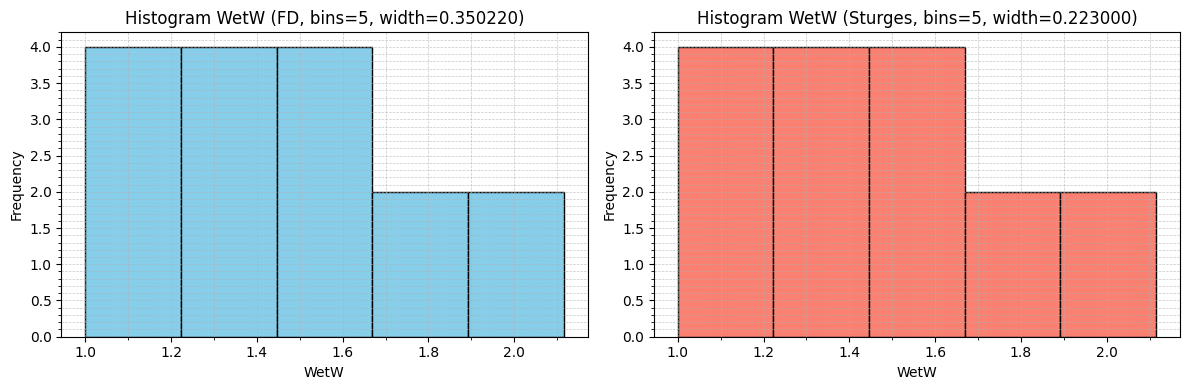


Tabel Histogram (Freedman–Diaconis):


,Bin Start,Bin End,Frequency
0,1.000,1.223,4
1,1.223,1.446,4
2,1.446,1.669,4
3,1.669,1.892,2
4,1.892,2.115,2



Tabel Histogram (Sturges):


,Bin Start,Bin End,Frequency
0,1.000,1.223,4
1,1.223,1.446,4
2,1.446,1.669,4
3,1.669,1.892,2
4,1.892,2.115,2


In [79]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
from matplotlib.ticker import MultipleLocator

def compute_bins(series, method='fd'):
    data = series.dropna().values
    n = len(data)
    if n < 2:
        return 10, None
    if method == 'fd':
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25
        if iqr == 0:
            return max(5, int(np.sqrt(n))), None
        h = 2 * iqr / (n ** (1/3))
        bins = max(5, int(np.ceil((data.max() - data.min()) / h)))
        return bins, h
    elif method == 'sturges':
        if n == 0 or (data.max() - data.min()) == 0:
            return max(5, int(np.sqrt(n))), None
        bins = int(np.ceil(np.log2(n) + 1))
        h = (data.max() - data.min()) / bins
        return bins, h
    else:
        return 10, None

def analyze_wetw(df_recovery):
    if 'WetW' not in df_recovery.columns:
        print("Kolom 'WetW' tidak ada di dataframe.")
        return

    data = df_recovery['WetW'].dropna()
    if data.empty:
        print("Tidak ada data 'WetW' yang valid setelah drop NaN.")
        return

    # --- hitung jumlah bins ---
    bins_fd, h_fd = compute_bins(data, method='fd')
    bins_st, h_st = compute_bins(data, method='sturges')

    width_fd_str = f"{h_fd:.6f}" if h_fd is not None else "N/A"
    width_st_str = f"{h_st:.6f}" if h_st is not None else "N/A"

    print("\nBin calculation:")
    print(f"Freedman–Diaconis -> bins={bins_fd}, width={width_fd_str}")
    print(f"Sturges -> bins={bins_st}, width={width_st_str}")

    # --- plot histogram ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Freedman–Diaconis
    counts_fd, edges_fd, _ = axes[0].hist(data, bins=bins_fd, color='skyblue', edgecolor='black')
    axes[0].set_title(f"Histogram WetW (FD, bins={bins_fd}, width={width_fd_str})")
    axes[0].set_xlabel("WetW")
    axes[0].set_ylabel("Frequency")
    axes[0].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Sturges
    counts_st, edges_st, _ = axes[1].hist(data, bins=bins_st, color='salmon', edgecolor='black')
    axes[1].set_title(f"Histogram WetW (Sturges, bins={bins_st}, width={width_st_str})")
    axes[1].set_xlabel("WetW")
    axes[1].set_ylabel("Frequency")
    axes[1].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

    # --- buat tabel histogram ---
    table_fd = pd.DataFrame({
        "Bin Start": edges_fd[:-1],
        "Bin End": edges_fd[1:],
        "Frequency": counts_fd.astype(int)
    })

    table_st = pd.DataFrame({
        "Bin Start": edges_st[:-1],
        "Bin End": edges_st[1:],
        "Frequency": counts_st.astype(int)
    })

    print("\nTabel Histogram (Freedman–Diaconis):")
    display(table_fd)

    print("\nTabel Histogram (Sturges):")
    display(table_st)

    return data

# --- Contoh pemanggilan ---
wetw_data = analyze_wetw(df_recovery)

In [80]:
import numpy as np
from IPython.display import display

def filter_wetw_normal(df_recovery, lower_bound, upper_bound):
    """
    Filter data WetW berdasarkan batas bawah/atas,
    sekaligus memastikan hanya baris dengan Outlier_Status = 'Normal' yang lolos.
    Setelah selesai, kolom Outlier_Status dihapus.
    """
    # --- Filter berdasarkan WetW ---
    df_wetw = df_recovery[(df_recovery['WetW'] >= lower_bound) &
                          (df_recovery['WetW'] <= upper_bound)].copy()

    # --- Pastikan hanya baris Normal yang lolos ---
    if 'Outlier_Status' in df_wetw.columns:
        df_wetw = df_wetw[df_wetw['Outlier_Status'] == "Normal"].copy()
        # Drop kolom Outlier_Status setelah selesai
        df_wetw = df_wetw.drop(columns=['Outlier_Status'])
    else:
        print("Kolom Outlier_Status tidak ditemukan, hanya filter WetW yang diterapkan.")

    print(f"\nFiltered rows (Normal only): {len(df_wetw)}")
    display(df_wetw.head(10))

    return df_wetw

# --- Contoh pemanggilan ---
lower_bound = float(input("Masukkan batas bawah (>=): "))
upper_bound = float(input("Masukkan batas atas (<=): "))

df_wetw = filter_wetw_normal(df_recovery, lower_bound, upper_bound)

Masukkan batas bawah (>=): 1.000
Masukkan batas atas (<=): 2.115

Filtered rows (Normal only): 14


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF,Normalized_WetW,Trendline_Pred
158,CS8230796,Belambus Blok 1 Spasi 100,Belambus_Selatan,5.7,6.00,0.30,1.0,1.280,28.125,0.920,HSAP,SAP,SAP,SAP,1.454594,1.045489,1.280,1.351626
185,CS8230798,Belambus Blok 1 Spasi 100,Belambus_Selatan,5.0,5.25,0.25,1.0,1.260,19.444,1.015,HSAP,SAP,SAP,SAP,1.718239,1.384137,1.260,1.228693
200,CS8230802,Belambus Blok 1 Spasi 100,Belambus_Selatan,6.0,6.30,0.30,1.0,1.455,18.213,1.190,HSAP,Sap,SAP,SAP,1.653464,1.352317,1.455,1.351626
201,CS8230802,Belambus Blok 1 Spasi 100,Belambus_Selatan,6.3,6.55,0.25,1.0,1.000,38.500,0.615,HSAP,Sap,SAP,SAP,1.363681,0.838664,1.000,1.228693
217,CS8230803,Belambus Blok 1 Spasi 100,Belambus_Selatan,7.3,7.50,0.20,1.0,1.085,28.111,0.780,HSAP,Sap,SAP,SAP,1.849493,1.329589,1.085,1.105761
248,CS8230808,Belambus Blok 1 Spasi 100,Belambus_Selatan,10.0,10.30,0.30,1.0,1.590,17.610,1.310,HSAP,BR,SAP,SAP,1.806878,1.488686,1.590,1.351626
289,CS8230810,Belambus Blok 1 Spasi 100,Belambus_Selatan,7.0,7.45,0.45,1.0,1.640,26.220,1.210,HSAP,Sap,SAP,SAP,1.242465,0.916697,1.640,1.720423
303,CS8230811,Belambus Blok 1 Spasi 100,Belambus_Selatan,7.9,8.30,0.40,1.0,1.395,18.638,1.135,HSAP,Sap,SAP,SAP,1.188960,0.967362,1.395,1.597491
304,CS8230811,Belambus Blok 1 Spasi 100,Belambus_Selatan,6.0,6.50,0.50,1.0,2.115,16.312,1.770,HSAP,Sap,SAP,SAP,1.442093,1.206858,2.115,1.843356
305,CS8230811,Belambus Blok 1 Spasi 100,Belambus_Selatan,9.6,10.00,0.40,1.0,1.585,24.606,1.195,HSAP,Sap,SAP,SAP,1.350897,1.018500,1.585,1.597491


#Filter By MC


Descriptive statistics for H2O:
Count: 14
Mean: 22.411429
Standard Error: 1.841069
Median: 20.159
Mode: 11.594
Standard Deviation: 6.888649
Sample Variance: 47.453488
Kurtosis: 0.200703
Skewness: 0.707196
Range: 26.906
Minimum: 11.594
Maximum: 38.5
Sum: 313.76000000000005
Confidence Level (95%): ±3.977388

Bin calculation:
Freedman–Diaconis -> bins=5, width=8.069648
Sturges -> bins=5, width=5.381200


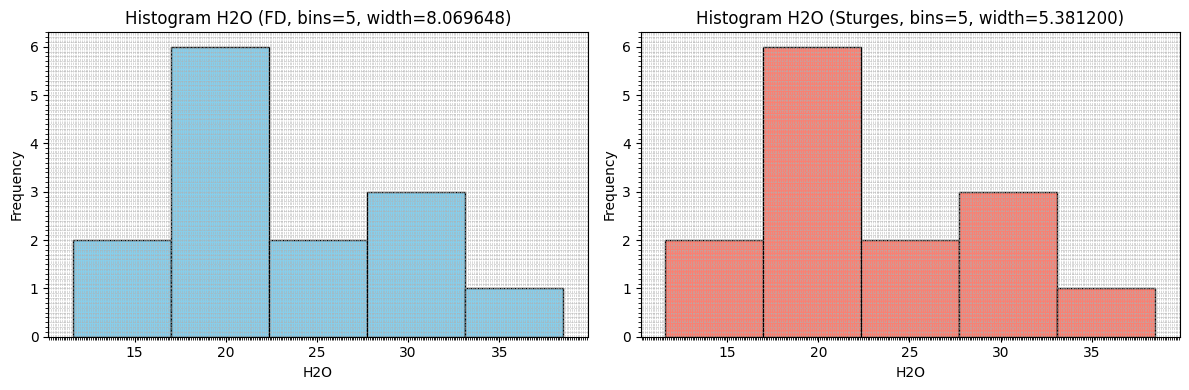


Tabel Histogram (Freedman–Diaconis):


,Bin Start,Bin End,Frequency
0,11.5940,16.9752,2
1,16.9752,22.3564,6
2,22.3564,27.7376,2
3,27.7376,33.1188,3
4,33.1188,38.5000,1



Tabel Histogram (Sturges):


,Bin Start,Bin End,Frequency
0,11.5940,16.9752,2
1,16.9752,22.3564,6
2,22.3564,27.7376,2
3,27.7376,33.1188,3
4,33.1188,38.5000,1


In [81]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
from matplotlib.ticker import MultipleLocator

def compute_bins(series, method='fd'):
    data = series.dropna().values
    n = len(data)
    if n < 2:
        return 10, None
    if method == 'fd':
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25
        if iqr == 0:
            return max(5, int(np.sqrt(n))), None
        h = 2 * iqr / (n ** (1/3))
        bins = max(5, int(np.ceil((data.max() - data.min()) / h)))
        return bins, h
    elif method == 'sturges':
        if n == 0 or (data.max() - data.min()) == 0:
            return max(5, int(np.sqrt(n))), None
        bins = int(np.ceil(np.log2(n) + 1))
        h = (data.max() - data.min()) / bins
        return bins, h
    else:
        return 10, None

def descriptive_stats(series, label="H2O"):
    data = series.dropna().values
    n = len(data)
    if n == 0:
        print(f"\nNo data available for {label}.")
        return

    mean = np.mean(data)
    std = np.std(data, ddof=1) if n > 1 else np.nan
    se = stats.sem(data) if n > 1 else np.nan
    median = np.median(data)
    mode = stats.mode(data, keepdims=True).mode[0]
    var = np.var(data, ddof=1) if n > 1 else np.nan
    kurt = stats.kurtosis(data) if n > 3 else np.nan
    skew = stats.skew(data) if n > 2 else np.nan
    rng = np.max(data) - np.min(data)
    conf95 = stats.t.ppf(0.975, n-1) * se if n > 1 else np.nan

    print(f"\nDescriptive statistics for {label}:")
    print(f"Count: {n}")
    print(f"Mean: {mean:.6f}")
    print(f"Standard Error: {se:.6f}" if not np.isnan(se) else "Standard Error: N/A")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std:.6f}" if not np.isnan(std) else "Standard Deviation: N/A")
    print(f"Sample Variance: {var:.6f}" if not np.isnan(var) else "Sample Variance: N/A")
    print(f"Kurtosis: {kurt:.6f}" if not np.isnan(kurt) else "Kurtosis: N/A")
    print(f"Skewness: {skew:.6f}" if not np.isnan(skew) else "Skewness: N/A")
    print(f"Range: {rng}")
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")
    print(f"Sum: {np.sum(data)}")
    print(f"Confidence Level (95%): ±{conf95:.6f}" if not np.isnan(conf95) else "Confidence Level (95%): N/A")

def analyze_h2o(df_wetw):
    if 'H2O' not in df_wetw.columns:
        print("Kolom 'H2O' tidak ada di dataframe.")
        return

    data = df_wetw['H2O'].dropna()
    if data.empty:
        print("Tidak ada data 'H2O' yang valid setelah drop NaN.")
        return

    # --- tampilkan descriptive statistics ---
    descriptive_stats(data, label="H2O")

    # --- hitung jumlah bins dan bin width ---
    bins_fd, h_fd = compute_bins(data, method='fd')
    bins_st, h_st = compute_bins(data, method='sturges')

    width_fd_str = f"{h_fd:.6f}" if h_fd is not None else "N/A"
    width_st_str = f"{h_st:.6f}" if h_st is not None else "N/A"

    print("\nBin calculation:")
    print(f"Freedman–Diaconis -> bins={bins_fd}, width={width_fd_str}")
    print(f"Sturges -> bins={bins_st}, width={width_st_str}")

    # --- plot histogram dengan minor ticks interval 0.1 ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Freedman–Diaconis
    counts_fd, edges_fd, _ = axes[0].hist(data, bins=bins_fd, color='skyblue', edgecolor='black')
    axes[0].set_title(f"Histogram H2O (FD, bins={bins_fd}, width={width_fd_str})")
    axes[0].set_xlabel("H2O")
    axes[0].set_ylabel("Frequency")
    axes[0].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Sturges
    counts_st, edges_st, _ = axes[1].hist(data, bins=bins_st, color='salmon', edgecolor='black')
    axes[1].set_title(f"Histogram H2O (Sturges, bins={bins_st}, width={width_st_str})")
    axes[1].set_xlabel("H2O")
    axes[1].set_ylabel("Frequency")
    axes[1].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

    # --- buat tabel histogram ---
    table_fd = pd.DataFrame({
        "Bin Start": edges_fd[:-1],
        "Bin End": edges_fd[1:],
        "Frequency": counts_fd.astype(int)
    })

    table_st = pd.DataFrame({
        "Bin Start": edges_st[:-1],
        "Bin End": edges_st[1:],
        "Frequency": counts_st.astype(int)
    })

    print("\nTabel Histogram (Freedman–Diaconis):")
    display(table_fd)

    print("\nTabel Histogram (Sturges):")
    display(table_st)

    return data

# --- Contoh pemanggilan ---
h2o_data = analyze_h2o(df_wetw)

In [82]:

import numpy as np
from IPython.display import display

# Input batas bawah dan atas untuk H2O
lower_bound = float(input("is greater than or equal to: "))
upper_bound = float(input("is less than or equal to: "))

# Filter df_wetw berdasarkan H2O
df_h2o = df_wetw[(df_wetw['H2O'] >= lower_bound) &
                 (df_wetw['H2O'] <= upper_bound)].copy()

print(f"\nFiltered rows (H2O): {len(df_h2o)}")
display(df_h2o.head(10))

is greater than or equal to: 11.5940
is less than or equal to: 33.1188

Filtered rows (H2O): 13


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF,Normalized_WetW,Trendline_Pred
158,CS8230796,Belambus Blok 1 Spasi 100,Belambus_Selatan,5.7,6.00,0.30,1.0,1.280,28.125,0.920,HSAP,SAP,SAP,SAP,1.454594,1.045489,1.280,1.351626
185,CS8230798,Belambus Blok 1 Spasi 100,Belambus_Selatan,5.0,5.25,0.25,1.0,1.260,19.444,1.015,HSAP,SAP,SAP,SAP,1.718239,1.384137,1.260,1.228693
200,CS8230802,Belambus Blok 1 Spasi 100,Belambus_Selatan,6.0,6.30,0.30,1.0,1.455,18.213,1.190,HSAP,Sap,SAP,SAP,1.653464,1.352317,1.455,1.351626
217,CS8230803,Belambus Blok 1 Spasi 100,Belambus_Selatan,7.3,7.50,0.20,1.0,1.085,28.111,0.780,HSAP,Sap,SAP,SAP,1.849493,1.329589,1.085,1.105761
248,CS8230808,Belambus Blok 1 Spasi 100,Belambus_Selatan,10.0,10.30,0.30,1.0,1.590,17.610,1.310,HSAP,BR,SAP,SAP,1.806878,1.488686,1.590,1.351626
289,CS8230810,Belambus Blok 1 Spasi 100,Belambus_Selatan,7.0,7.45,0.45,1.0,1.640,26.220,1.210,HSAP,Sap,SAP,SAP,1.242465,0.916697,1.640,1.720423
303,CS8230811,Belambus Blok 1 Spasi 100,Belambus_Selatan,7.9,8.30,0.40,1.0,1.395,18.638,1.135,HSAP,Sap,SAP,SAP,1.188960,0.967362,1.395,1.597491
304,CS8230811,Belambus Blok 1 Spasi 100,Belambus_Selatan,6.0,6.50,0.50,1.0,2.115,16.312,1.770,HSAP,Sap,SAP,SAP,1.442093,1.206858,2.115,1.843356
305,CS8230811,Belambus Blok 1 Spasi 100,Belambus_Selatan,9.6,10.00,0.40,1.0,1.585,24.606,1.195,HSAP,Sap,SAP,SAP,1.350897,1.018500,1.585,1.597491
376,CS8230818,Belambus Blok 1 Spasi 100,Belambus_Selatan,9.6,10.00,0.40,1.0,1.720,27.907,1.240,HSAP,SAP,SAP,SAP,1.465958,1.056853,1.720,1.597491


# Filter By DTF


Descriptive statistics for DTF:
Count: 13
Mean: 1.180145
Standard Error: 0.057063
Median: 1.206858051
Mode: 0.886392919
Standard Deviation: 0.205744
Sample Variance: 0.042331
Kurtosis: -1.496393
Skewness: -0.046119
Range: 0.6022926239999999
Minimum: 0.886392919
Maximum: 1.488685543
Sum: 15.341889405
Confidence Level (95%): ±0.124330

Bin calculation:
Freedman–Diaconis -> bins=5, width=0.283939
Sturges -> bins=5, width=0.120459


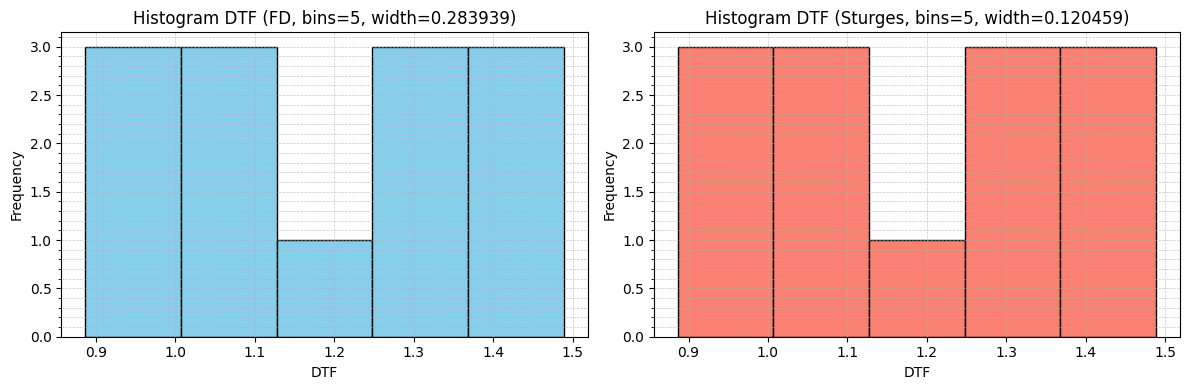


Tabel Histogram (Freedman–Diaconis):


,Bin Start,Bin End,Frequency
0,0.886393,1.006851,3
1,1.006851,1.127310,3
2,1.127310,1.247768,1
3,1.247768,1.368227,3
4,1.368227,1.488686,3



Tabel Histogram (Sturges):


,Bin Start,Bin End,Frequency
0,0.886393,1.006851,3
1,1.006851,1.127310,3
2,1.127310,1.247768,1
3,1.247768,1.368227,3
4,1.368227,1.488686,3


In [83]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
from matplotlib.ticker import MultipleLocator

def compute_bins(series, method='fd'):
    data = series.dropna().values
    n = len(data)
    if n < 2:
        return 10, None
    if method == 'fd':
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25
        if iqr == 0:
            return max(5, int(np.sqrt(n))), None
        h = 2 * iqr / (n ** (1/3))
        bins = max(5, int(np.ceil((data.max() - data.min()) / h)))
        return bins, h
    elif method == 'sturges':
        if n == 0 or (data.max() - data.min()) == 0:
            return max(5, int(np.sqrt(n))), None
        bins = int(np.ceil(np.log2(n) + 1))
        h = (data.max() - data.min()) / bins
        return bins, h
    else:
        return 10, None

def descriptive_stats(series, label="DTF"):
    data = series.dropna().values
    n = len(data)
    if n == 0:
        print(f"\nNo data available for {label}.")
        return

    mean = np.mean(data)
    std = np.std(data, ddof=1) if n > 1 else np.nan
    se = stats.sem(data) if n > 1 else np.nan
    median = np.median(data)
    mode = stats.mode(data, keepdims=True).mode[0]
    var = np.var(data, ddof=1) if n > 1 else np.nan
    kurt = stats.kurtosis(data) if n > 3 else np.nan
    skew = stats.skew(data) if n > 2 else np.nan
    rng = np.max(data) - np.min(data)
    conf95 = stats.t.ppf(0.975, n-1) * se if n > 1 else np.nan

    print(f"\nDescriptive statistics for {label}:")
    print(f"Count: {n}")
    print(f"Mean: {mean:.6f}")
    print(f"Standard Error: {se:.6f}" if not np.isnan(se) else "Standard Error: N/A")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std:.6f}" if not np.isnan(std) else "Standard Deviation: N/A")
    print(f"Sample Variance: {var:.6f}" if not np.isnan(var) else "Sample Variance: N/A")
    print(f"Kurtosis: {kurt:.6f}" if not np.isnan(kurt) else "Kurtosis: N/A")
    print(f"Skewness: {skew:.6f}" if not np.isnan(skew) else "Skewness: N/A")
    print(f"Range: {rng}")
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")
    print(f"Sum: {np.sum(data)}")
    print(f"Confidence Level (95%): ±{conf95:.6f}" if not np.isnan(conf95) else "Confidence Level (95%): N/A")

def analyze_dtf(df_h2o):
    if 'DTF' not in df_h2o.columns:
        print("Kolom 'DTF' tidak ada di dataframe.")
        return

    data = df_h2o['DTF'].dropna()
    if data.empty:
        print("Tidak ada data 'DTF' yang valid setelah drop NaN.")
        return

    # --- tampilkan descriptive statistics ---
    descriptive_stats(data, label="DTF")

    # --- hitung jumlah bins dan bin width ---
    bins_fd, h_fd = compute_bins(data, method='fd')
    bins_st, h_st = compute_bins(data, method='sturges')

    width_fd_str = f"{h_fd:.6f}" if h_fd is not None else "N/A"
    width_st_str = f"{h_st:.6f}" if h_st is not None else "N/A"

    print("\nBin calculation:")
    print(f"Freedman–Diaconis -> bins={bins_fd}, width={width_fd_str}")
    print(f"Sturges -> bins={bins_st}, width={width_st_str}")

    # --- plot histogram dengan minor ticks interval 0.1 ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Freedman–Diaconis
    counts_fd, edges_fd, _ = axes[0].hist(data, bins=bins_fd, color='skyblue', edgecolor='black')
    axes[0].set_title(f"Histogram DTF (FD, bins={bins_fd}, width={width_fd_str})")
    axes[0].set_xlabel("DTF")
    axes[0].set_ylabel("Frequency")
    axes[0].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Sturges
    counts_st, edges_st, _ = axes[1].hist(data, bins=bins_st, color='salmon', edgecolor='black')
    axes[1].set_title(f"Histogram DTF (Sturges, bins={bins_st}, width={width_st_str})")
    axes[1].set_xlabel("DTF")
    axes[1].set_ylabel("Frequency")
    axes[1].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

    # --- buat tabel histogram ---
    table_fd = pd.DataFrame({
        "Bin Start": edges_fd[:-1],
        "Bin End": edges_fd[1:],
        "Frequency": counts_fd.astype(int)
    })

    table_st = pd.DataFrame({
        "Bin Start": edges_st[:-1],
        "Bin End": edges_st[1:],
        "Frequency": counts_st.astype(int)
    })

    print("\nTabel Histogram (Freedman–Diaconis):")
    display(table_fd)

    print("\nTabel Histogram (Sturges):")
    display(table_st)

    return data

# --- Contoh pemanggilan ---
dtf_data = analyze_dtf(df_h2o)

In [87]:
import numpy as np
from IPython.display import display

# Input batas bawah dan atas untuk H2O
lower_bound = float(input("is greater than or equal to: "))
upper_bound = float(input("is less than or equal to: "))

# Filter df_h2o berdasarkan DTF
df_dtf = df_h2o[(df_h2o['DTF'] >= lower_bound) &
                (df_h2o['DTF'] <= upper_bound)].copy()

print(f"\nFiltered rows (DTF): {len(df_dtf)}")
display(df_dtf.head(89))

is greater than or equal to: 1.127310
is less than or equal to: 1.488686

Filtered rows (DTF): 7


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF,Normalized_WetW,Trendline_Pred
185,CS8230798,Belambus Blok 1 Spasi 100,Belambus_Selatan,5.0,5.25,0.25,1.0,1.260,19.444,1.015,HSAP,SAP,SAP,SAP,1.718239,1.384137,1.260,1.228693
200,CS8230802,Belambus Blok 1 Spasi 100,Belambus_Selatan,6.0,6.30,0.30,1.0,1.455,18.213,1.190,HSAP,Sap,SAP,SAP,1.653464,1.352317,1.455,1.351626
217,CS8230803,Belambus Blok 1 Spasi 100,Belambus_Selatan,7.3,7.50,0.20,1.0,1.085,28.111,0.780,HSAP,Sap,SAP,SAP,1.849493,1.329589,1.085,1.105761
248,CS8230808,Belambus Blok 1 Spasi 100,Belambus_Selatan,10.0,10.30,0.30,1.0,1.590,17.610,1.310,HSAP,BR,SAP,SAP,1.806878,1.488686,1.590,1.351626
304,CS8230811,Belambus Blok 1 Spasi 100,Belambus_Selatan,6.0,6.50,0.50,1.0,2.115,16.312,1.770,HSAP,Sap,SAP,SAP,1.442093,1.206858,2.115,1.843356
600,CS8230869,Belambus Blok 1 Spasi 100,Belambus_Selatan,6.8,7.00,0.20,1.0,1.030,20.874,0.815,HSAP,Sap,SAP,SAP,1.755740,1.389250,1.030,1.105761
733,CS8230887,Belambus Blok 1 Spasi 100,Belambus_Selatan,5.0,5.40,0.40,1.0,1.725,11.594,1.525,HSAP,SAP,SAP,SAP,1.470219,1.299759,1.725,1.597491


# SUMMARY

In [88]:
import numpy as np
import scipy.stats as stats

def descriptive_stats(series, label):
    data = series.dropna().values
    n = len(data)
    if n == 0:
        print(f"\nNo data available for {label}.")
        return

    mean = np.mean(data)
    std = np.std(data, ddof=1) if n > 1 else np.nan
    se = stats.sem(data) if n > 1 else np.nan
    median = np.median(data)
    mode = stats.mode(data, keepdims=True).mode[0]
    var = np.var(data, ddof=1) if n > 1 else np.nan
    kurt = stats.kurtosis(data) if n > 3 else np.nan
    skew = stats.skew(data) if n > 2 else np.nan
    rng = np.max(data) - np.min(data)
    conf95 = stats.t.ppf(0.975, n-1) * se if n > 1 else np.nan

    print(f"\nDescriptive statistics for {label}:")
    print(f"Count: {n}")
    print(f"Mean: {mean:.6f}")
    print(f"Standard Error: {se:.6f}" if not np.isnan(se) else "Standard Error: N/A")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std:.6f}" if not np.isnan(std) else "Standard Deviation: N/A")
    print(f"Sample Variance: {var:.6f}" if not np.isnan(var) else "Sample Variance: N/A")
    print(f"Kurtosis: {kurt:.6f}" if not np.isnan(kurt) else "Kurtosis: N/A")
    print(f"Skewness: {skew:.6f}" if not np.isnan(skew) else "Skewness: N/A")
    print(f"Range: {rng}")
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")
    print(f"Sum: {np.sum(data)}")
    print(f"Confidence Level (95%): ±{conf95:.6f}" if not np.isnan(conf95) else "Confidence Level (95%): N/A")

# --- Jalankan untuk semua kolom yang diminta ---
target_columns = ["Interval", "CoreRec", "WetW", "H2O", "DryW", "WTF", "DTF"]

for col in target_columns:
    if col in df_dtf.columns:
        descriptive_stats(df_dtf[col], label=col)
    else:
        print(f"\nKolom {col} tidak ditemukan di df_dtf.")


Descriptive statistics for Interval:
Count: 7
Mean: 0.307143
Standard Error: 0.041445
Median: 0.3
Mode: 0.2
Standard Deviation: 0.109653
Sample Variance: 0.012024
Kurtosis: -0.670572
Skewness: 0.727283
Range: 0.3
Minimum: 0.2
Maximum: 0.5
Sum: 2.15
Confidence Level (95%): ±0.101412

Descriptive statistics for CoreRec:
Count: 7
Mean: 1.000000
Standard Error: 0.000000
Median: 1.0
Mode: 1.0
Standard Deviation: 0.000000
Sample Variance: 0.000000
Kurtosis: N/A
Skewness: N/A
Range: 0.0
Minimum: 1.0
Maximum: 1.0
Sum: 7.0
Confidence Level (95%): ±0.000000

Descriptive statistics for WetW:
Count: 7
Mean: 1.465714
Standard Error: 0.144870
Median: 1.455
Mode: 1.03
Standard Deviation: 0.383291
Sample Variance: 0.146912
Kurtosis: -0.825900
Skewness: 0.468240
Range: 1.0850000000000002
Minimum: 1.03
Maximum: 2.115
Sum: 10.26
Confidence Level (95%): ±0.354485

Descriptive statistics for H2O:
Count: 7
Mean: 18.879714
Standard Error: 1.897641
Median: 18.213
Mode: 11.594
Standard Deviation: 5.020686
Sam

/tmp/ipython-input-1308544473.py:17: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = stats.kurtosis(data) if n > 3 else np.nan
/tmp/ipython-input-1308544473.py:18: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew = stats.skew(data) if n > 2 else np.nan


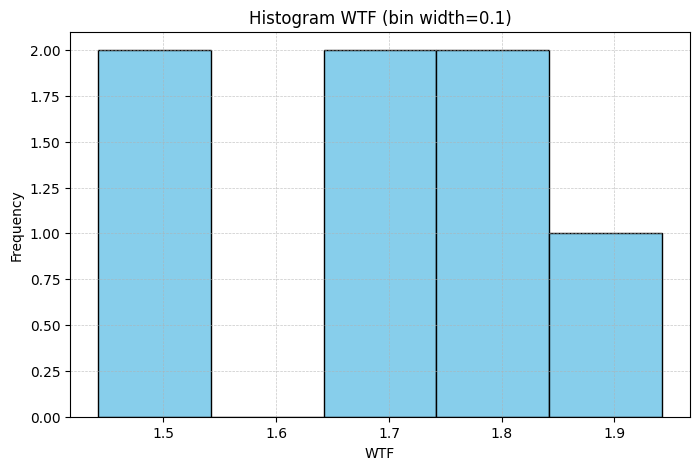


Tabel Histogram WTF:


,Bin Start,Bin End,Frequency
0,1.442093,1.542093,2
1,1.542093,1.642093,0
2,1.642093,1.742093,2
3,1.742093,1.842093,2
4,1.842093,1.942093,1


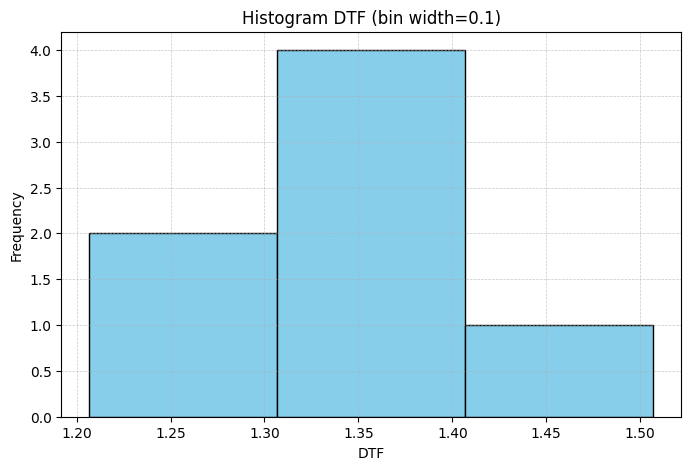


Tabel Histogram DTF:


,Bin Start,Bin End,Frequency
0,1.206858,1.306858,2
1,1.306858,1.406858,4
2,1.406858,1.506858,1


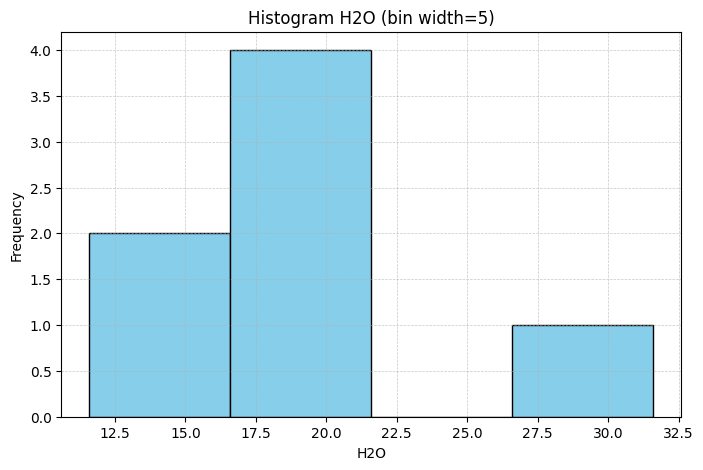


Tabel Histogram H2O:


,Bin Start,Bin End,Frequency
0,11.594,16.594,2
1,16.594,21.594,4
2,21.594,26.594,0
3,26.594,31.594,1


In [89]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import MultipleLocator

def plot_histogram_fixed_width(series, bin_width, label):
    data = series.dropna().values
    if len(data) == 0:
        print(f"Tidak ada data untuk {label}.")
        return None

    # Tentukan bins berdasarkan bin_width
    min_val, max_val = data.min(), data.max()
    bins = np.arange(min_val, max_val + bin_width, bin_width)

    # Plot histogram
    plt.figure(figsize=(8,5))
    counts, edges, _ = plt.hist(data, bins=bins, color='skyblue', edgecolor='black')
    plt.title(f"Histogram {label} (bin width={bin_width})")
    plt.xlabel(label)
    plt.ylabel("Frequency")

    # Minor ticks sesuai bin width
    plt.gca().xaxis.set_minor_locator(MultipleLocator(bin_width))
    plt.gca().yaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.show()

    # Buat tabel histogram
    table = pd.DataFrame({
        "Bin Start": edges[:-1],
        "Bin End": edges[1:],
        "Frequency": counts.astype(int)
    })

    print(f"\nTabel Histogram {label}:")
    display(table)
    return table

# --- Contoh pemanggilan ---
table_wtf = plot_histogram_fixed_width(df_dtf['WTF'], bin_width=0.1, label="WTF")
table_dtf = plot_histogram_fixed_width(df_dtf['DTF'], bin_width=0.1, label="DTF")
table_h2o = plot_histogram_fixed_width(df_dtf['H2O'], bin_width=5, label="H2O")

In [90]:
import pandas as pd

# Input nama Block, GEN_LYR, dan Material
block_name = input("Masukkan nama Block: ")
gen_lyr = input("Masukkan GEN_LYR: ")
material = input("Masukkan Material: ")

# Hitung nilai ringkasan (contoh: mean)
summary = {
    "Block": block_name,
    "GEN_LYR": gen_lyr,
    "Material": material,
    "Interval_mean": df_dtf['Interval'].dropna().mean(),
    "CoreRec_mean": df_dtf['CoreRec'].dropna().mean(),
    "WetW_mean": df_dtf['WetW'].dropna().mean(),
    "H2O_mean": df_dtf['H2O'].dropna().mean(),
    "DryW_mean": df_dtf['DryW'].dropna().mean(),
    "WTF_mean": df_dtf['WTF'].dropna().mean(),
    "DTF_mean": df_dtf['DTF'].dropna().mean()
}

# Buat nama variabel DataFrame sesuai input
var_name = f"df_{block_name.replace(' ', '_').lower()}_{gen_lyr.lower()}_{material.lower()}"
globals()[var_name] = pd.DataFrame([summary])

print(f"\nTabel Ringkasan tersimpan sebagai variabel: {var_name}")
display(globals()[var_name])

Masukkan nama Block: Belambus Selatan
Masukkan GEN_LYR: SAP
Masukkan Material: HSAP

Tabel Ringkasan tersimpan sebagai variabel: df_belambus_selatan_sap_hsap


,Block,GEN_LYR,Material,Interval_mean,CoreRec_mean,WetW_mean,H2O_mean,DryW_mean,WTF_mean,DTF_mean
0,Belambus Selatan,SAP,HSAP,0.307143,1.0,1.465714,18.879714,1.200714,1.670875,1.350085


# Proporsional Averaging

In [182]:
# Daftar material yang memang ada di hasil filter
materials_filter = df_belambus_selatan_lim_all['Material'].unique().tolist()

# Filter raw data hanya untuk material yang relevan
df_raw_filtered = df_raw[df_raw['Material'].isin(materials_filter)]

# Hitung jumlah raw per material
raw_counts = df_raw_filtered['Material'].value_counts().reset_index()
raw_counts.columns = ['Material', 'Raw_Count']

# Hitung jumlah hasil filter per material
filtered_counts = df_belambus_selatan_lim_all['Material'].value_counts().reset_index()
filtered_counts.columns = ['Material', 'Filtered_Count']

# Gabungkan
summary = pd.merge(raw_counts, filtered_counts, on='Material', how='inner')

# Hitung persentase proporsi tiap material terhadap total raw relevan
summary['Percentage_of_Total'] = (summary['Raw_Count'] / summary['Raw_Count'].sum()) * 100

print("\nSummary per Material (hanya material relevan):")
display(summary)


Summary per Material (hanya material relevan):


,Material,Raw_Count,Filtered_Count,Percentage_of_Total
0,YLIM,168,1,38.268793
1,Lim,113,1,25.740319
2,RLIM,73,1,16.628702
3,ESAP,62,1,14.123007
4,GRV,12,1,2.733485
5,VIR,4,1,0.911162
6,IRC,4,1,0.911162
7,SAP,3,1,0.683371


In [184]:
import numpy as np
import pandas as pd

# --- 1. Buat mapping material -> proporsi (dari summary yang sudah dihitung sebelumnya) ---
weights_map = summary.set_index('Material')['Percentage_of_Total'] / 100.0

# --- 2. Fungsi untuk weighted descriptive statistics ---
def weighted_means(df, weights_map):
    stats = {}
    for col in ['Interval_mean','CoreRec_mean','WetW_mean','H2O_mean','DryW_mean','WTF_mean','DTF_mean']:
        values = df[col].values
        # Ambil bobot sesuai material tiap baris
        w = df['Material'].map(weights_map).values

        # Weighted mean
        mean = np.average(values, weights=w)

        # Simpan hasil
        stats[col] = mean

    return pd.DataFrame([stats])

# --- 3. Hitung descriptive statistics proporsional ---
summary_means = weighted_means(df_belambus_selatan_lim_all, weights_map)

print("\nDescriptive Statistics Proporsional (Material LIM, Weighted Means):")
display(summary_means)


Descriptive Statistics Proporsional (Material LIM, Weighted Means):


,Interval_mean,CoreRec_mean,WetW_mean,H2O_mean,DryW_mean,WTF_mean,DTF_mean
0,0.772068,0.996894,4.275182,30.296313,3.023638,1.926712,1.340095
